In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Part 0
- Loading the Dataset and creating a DataFrame


In [ ]:
data = sns.load_dataset(name='iris')
df = pd.DataFrame(data)

#Part 1

- To find: Mean and variance of Each Attribute

In [ ]:
def Variance_Calculator(mean,arr):
  denominator = len(arr) - 1 #Bessel Correction, a better estimation of the variance
  numerator=0

  for a in arr:
    numerator+=(a-mean)**2 #performing summation functionality

  return numerator/denominator

In [ ]:
mean_arr=[]
variance_arr=[]

for itr in df.columns[:-1]:
  sum = df[itr].sum()
  length = len(df[itr])
  mean_arr.append(sum/length)

  var= Variance_Calculator(sum/length,df[itr])
  variance_arr.append(var)

mean_values = pd.Series( [itr for itr in mean_arr] , index=["mean_sepal_length","mean_sepal_width", "mean_petal_length", "mean_petal_width"], dtype='float64')
variance_values = pd.Series( [itr for itr in variance_arr] , index=["var_sepal_length","var_sepal_width", "var_petal_length", "var_petal_width"], dtype='float64')

print(f"Mean of 4 attributes (columns)")
print(mean_values)
print("\n")

print(f"Variance of 4 attributes (columns)")
print(variance_values)

Mean of 4 attributes (columns)
mean_sepal_length    5.843333
mean_sepal_width     3.057333
mean_petal_length    3.758000
mean_petal_width     1.199333
dtype: float64


Variance of 4 attributes (columns)
var_sepal_length    0.685694
var_sepal_width     0.189979
var_petal_length    3.116278
var_petal_width     0.581006
dtype: float64


#Part 2
**Co-relations:**

- Finding the co-relation co-efficients between pair of attributes.
- First defining the function, then performing it on attributes and finalling plotting scatter plots.

a. Sepal Length and Sepal Width

b. Sepal Length and Petal Length

c. Sepal Length and Petal Width

d. Sepal Width and Petal Length

e. Sepal Width and Petal Width

f. Petal Length and Petal Width

**Defining Essential Functions**

In [ ]:
def coefficient_calculator(df_1, df_2):
    df_1.columns = [df_1.columns[0] + '(x)']
    df_2.columns = [df_2.columns[0] + '(y)']

    solution_df = pd.concat([df_1, df_2], axis=1)
    solution_df["xy"] = solution_df.iloc[:, 0] * solution_df.iloc[:, 1]
    solution_df["x^2"] = solution_df.iloc[:, 0] ** 2
    solution_df["y^2"] = solution_df.iloc[:, 1] ** 2

    n = len(df_1)
    sum_x = solution_df.iloc[:, 0].sum()
    sum_y = solution_df.iloc[:, 1].sum()
    sum_xx = solution_df["x^2"].sum()
    sum_yy = solution_df["y^2"].sum()
    sum_xy = solution_df["xy"].sum()

    numerator = n * sum_xy - sum_x * sum_y
    denominator = ((n * sum_xx - sum_x ** 2) * (n * sum_yy - sum_y ** 2)) ** 0.5

    return numerator / denominator

**Finding Co-relations Co-efficient**

In [ ]:
df_SL = pd.DataFrame(df.iloc[:, 0])
df_SW = pd.DataFrame(df.iloc[:, 1])
df_PL = pd.DataFrame(df.iloc[:, 2])
df_PW = pd.DataFrame(df.iloc[:, 3])

# Initialize lists to store results
answer = []
pairs = []

# a. Sepal Length and Sepal Width
answer.append(coefficient_calculator(df_SL, df_SW))
pairs.append("Sepal Length and Sepal Width")

# b. Sepal Length and Petal Length
answer.append(coefficient_calculator(df_SL, df_PL))
pairs.append("Sepal Length and Petal Length")

# c. Sepal Length and Petal Width
answer.append(coefficient_calculator(df_SL, df_PW))
pairs.append("Sepal Length and Petal Width")

# d. Sepal Width and Petal Length
answer.append(coefficient_calculator(df_SW, df_PL))
pairs.append("Sepal Width and Petal Length")

# e. Sepal Width and Petal Width
answer.append(coefficient_calculator(df_SW, df_PW))
pairs.append("Sepal Width and Petal Width")

# f. Petal Length and Petal Width
answer.append(coefficient_calculator(df_PL, df_PW))
pairs.append("Petal Length and Petal Width")

# Create DataFrame to display results
result_df = pd.DataFrame({'Pairs of attributes': pairs,
                          'Corelation Co-eff': answer,
                          'Co-relation Percentage':np.array(answer)*100})

result_df_sorted = result_df.sort_values(by='Corelation Co-eff', ascending=False)

print(result_df_sorted)

             Pairs of attributes  Corelation Co-eff  Co-relation Percentage
5   Petal Length and Petal Width           0.962865               96.286543
1  Sepal Length and Petal Length           0.871754               87.175378
2   Sepal Length and Petal Width           0.817941               81.794113
0   Sepal Length and Sepal Width          -0.117570              -11.756978
4    Sepal Width and Petal Width          -0.366126              -36.612593
3   Sepal Width and Petal Length          -0.428440              -42.844010


**Exploratory Graphs**

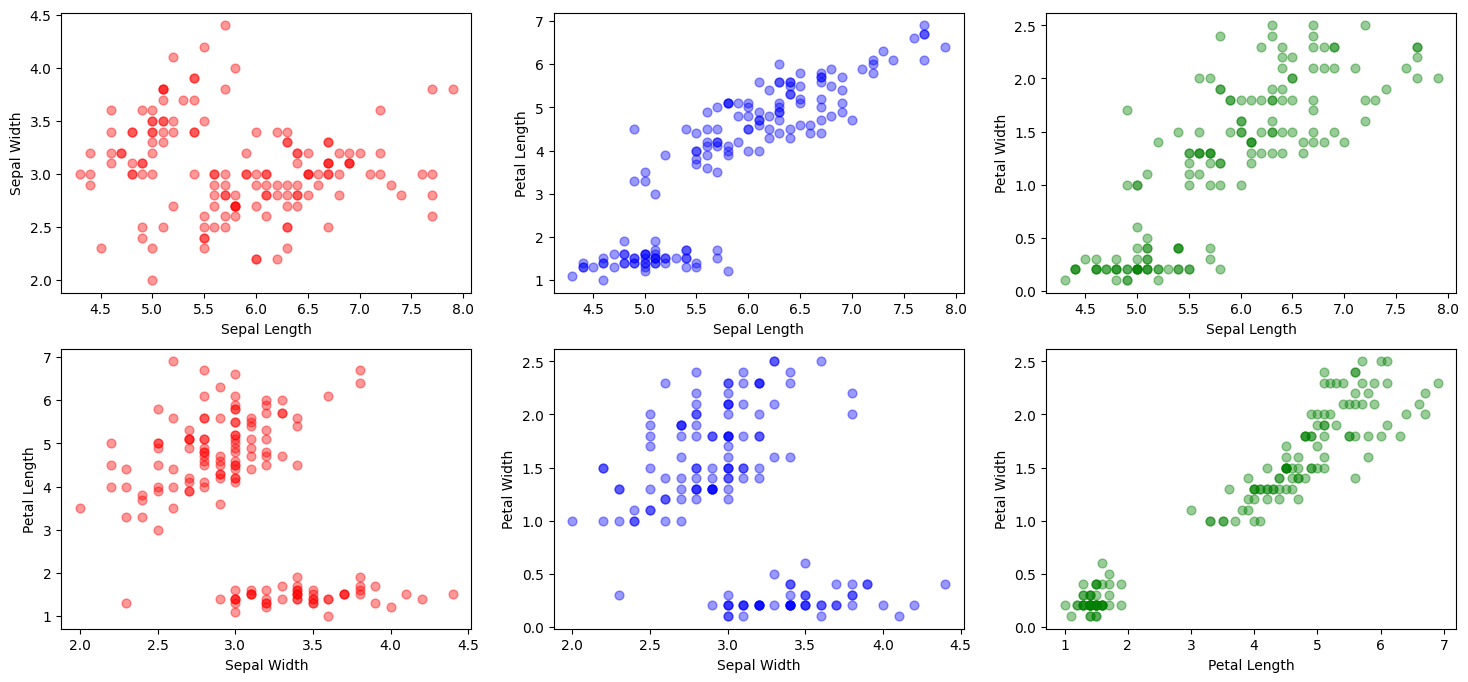

In [ ]:
#extracting the first four columns and converting it to a numpy array
explr_iris_array = np.array(data.iloc[:, :4])

plt.figure(figsize=(18, 8))

plt.subplot(2, 3, 1)
plt.scatter(explr_iris_array[:, 0], explr_iris_array[:, 1], c='r', s=40, alpha=0.4)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.subplot(2, 3, 2)
plt.scatter(explr_iris_array[:, 0], explr_iris_array[:, 2], c='b', s=40, alpha=0.4)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

plt.subplot(2, 3, 3)
plt.scatter(explr_iris_array[:, 0], explr_iris_array[:, 3], c='g', s=40, alpha=0.4)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')

plt.subplot(2, 3, 4)
plt.scatter(explr_iris_array[:, 1], explr_iris_array[:, 2], c='r', s=40, alpha=0.4)
plt.xlabel('Sepal Width')
plt.ylabel('Petal Length')

plt.subplot(2, 3, 5)
plt.scatter(explr_iris_array[:, 1], explr_iris_array[:, 3], c='b', s=40, alpha=0.4)
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

plt.subplot(2, 3, 6)
plt.scatter(explr_iris_array[:, 2], explr_iris_array[:, 3], c='g', s=40, alpha=0.4)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.show()

# Part 3

- Performing the same function but now for a unique specie.

**A. Sentosa**

In [ ]:
df_setosa=df[df.iloc[:,-1]=="setosa"]

df_SL = pd.DataFrame(df_setosa.iloc[:, 0])
df_SW = pd.DataFrame(df_setosa.iloc[:, 1])
df_PL = pd.DataFrame(df_setosa.iloc[:, 2])
df_PW = pd.DataFrame(df_setosa.iloc[:, 3])

#initializing lists to store results
answer = []
pairs = []

# a. Sepal Length and Sepal Width
answer.append(coefficient_calculator(df_SL, df_SW))
pairs.append("Sepal Length and Sepal Width")

# b. Sepal Length and Petal Length
answer.append(coefficient_calculator(df_SL, df_PL))
pairs.append("Sepal Length and Petal Length")

# c. Sepal Length and Petal Width
answer.append(coefficient_calculator(df_SL, df_PW))
pairs.append("Sepal Length and Petal Width")

# d. Sepal Width and Petal Length
answer.append(coefficient_calculator(df_SW, df_PL))
pairs.append("Sepal Width and Petal Length")

# e. Sepal Width and Petal Width
answer.append(coefficient_calculator(df_SW, df_PW))
pairs.append("Sepal Width and Petal Width")

# f. Petal Length and Petal Width
answer.append(coefficient_calculator(df_PL, df_PW))
pairs.append("Petal Length and Petal Width")

#result
result_df = pd.DataFrame({'Pairs of attributes': pairs,
                          'Corelation Co-eff': answer,
                          'Co-relation Percentage':np.array(answer)*100})

result_df_sorted = result_df.sort_values(by='Corelation Co-eff', ascending=False)

print(result_df_sorted)


             Pairs of attributes  Corelation Co-eff  Co-relation Percentage
0   Sepal Length and Sepal Width           0.742547               74.254669
5   Petal Length and Petal Width           0.331630               33.163004
2   Sepal Length and Petal Width           0.278098               27.809835
1  Sepal Length and Petal Length           0.267176               26.717576
4    Sepal Width and Petal Width           0.232752               23.275201
3   Sepal Width and Petal Length           0.177700               17.769997


**B. Versicolor**

In [ ]:
df_versicolor=df[df.iloc[:,-1]=="versicolor"]

df_SL = pd.DataFrame(df_versicolor.iloc[:, 0])
df_SW = pd.DataFrame(df_versicolor.iloc[:, 1])
df_PL = pd.DataFrame(df_versicolor.iloc[:, 2])
df_PW = pd.DataFrame(df_versicolor.iloc[:, 3])

answer = []
pairs = []

# a. Sepal Length and Sepal Width
answer.append(coefficient_calculator(df_SL, df_SW))
pairs.append("Sepal Length and Sepal Width")

# b. Sepal Length and Petal Length
answer.append(coefficient_calculator(df_SL, df_PL))
pairs.append("Sepal Length and Petal Length")

# c. Sepal Length and Petal Width
answer.append(coefficient_calculator(df_SL, df_PW))
pairs.append("Sepal Length and Petal Width")

# d. Sepal Width and Petal Length
answer.append(coefficient_calculator(df_SW, df_PL))
pairs.append("Sepal Width and Petal Length")

# e. Sepal Width and Petal Width
answer.append(coefficient_calculator(df_SW, df_PW))
pairs.append("Sepal Width and Petal Width")

# f. Petal Length and Petal Width
answer.append(coefficient_calculator(df_PL, df_PW))
pairs.append("Petal Length and Petal Width")

result_df = pd.DataFrame({'Pairs of attributes': pairs,
                          'Corelation Co-eff': answer,
                          'Co-relation Percentage':np.array(answer)*100})

result_df_sorted = result_df.sort_values(by='Corelation Co-eff', ascending=False)

print(result_df_sorted)


             Pairs of attributes  Corelation Co-eff  Co-relation Percentage
5   Petal Length and Petal Width           0.786668               78.666809
1  Sepal Length and Petal Length           0.754049               75.404896
4    Sepal Width and Petal Width           0.663999               66.399872
3   Sepal Width and Petal Length           0.560522               56.052209
2   Sepal Length and Petal Width           0.546461               54.646107
0   Sepal Length and Sepal Width           0.525911               52.591072


**C. Virginica**

In [ ]:
df_virginica=df[df.iloc[:,-1]=="virginica"]

df_SL = pd.DataFrame(df_virginica.iloc[:, 0])
df_SW = pd.DataFrame(df_virginica.iloc[:, 1])
df_PL = pd.DataFrame(df_virginica.iloc[:, 2])
df_PW = pd.DataFrame(df_virginica.iloc[:, 3])

answer = []
pairs = []

# a. Sepal Length and Sepal Width
answer.append(coefficient_calculator(df_SL, df_SW))
pairs.append("Sepal Length and Sepal Width")

# b. Sepal Length and Petal Length
answer.append(coefficient_calculator(df_SL, df_PL))
pairs.append("Sepal Length and Petal Length")

# c. Sepal Length and Petal Width
answer.append(coefficient_calculator(df_SL, df_PW))
pairs.append("Sepal Length and Petal Width")

# d. Sepal Width and Petal Length
answer.append(coefficient_calculator(df_SW, df_PL))
pairs.append("Sepal Width and Petal Length")

# e. Sepal Width and Petal Width
answer.append(coefficient_calculator(df_SW, df_PW))
pairs.append("Sepal Width and Petal Width")

# f. Petal Length and Petal Width
answer.append(coefficient_calculator(df_PL, df_PW))
pairs.append("Petal Length and Petal Width")

result_df = pd.DataFrame({'Pairs of attributes': pairs,
                          'Corelation Co-eff': answer,
                          'Co-relation Percentage':np.array(answer)*100})

result_df_sorted = result_df.sort_values(by='Corelation Co-eff', ascending=False)

print(result_df_sorted)


             Pairs of attributes  Corelation Co-eff  Co-relation Percentage
1  Sepal Length and Petal Length           0.864225               86.422473
4    Sepal Width and Petal Width           0.537728               53.772803
0   Sepal Length and Sepal Width           0.457228               45.722782
3   Sepal Width and Petal Length           0.401045               40.104458
5   Petal Length and Petal Width           0.322108               32.210822
2   Sepal Length and Petal Width           0.281108               28.110771
